In [26]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import re
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.metrics
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
data = pd.read_csv('flipkart_data.csv')
data.head()


,review,rating
0,It was nice produt. I like it's design a lot. ...,5.0
1,awesome sound....very pretty to see this nd th...,5.0
2,awesome sound quality. pros 7-8 hrs of battery...,4.0
3,I think it is such a good product not only as ...,5.0
4,awesome bass sound quality very good bettary l...,5.0


In [ ]:
# unique ratings
pd.unique(data['rating'])



array([ 5.,  4.,  1.,  3.,  2., nan])

<Axes: xlabel='rating', ylabel='count'>

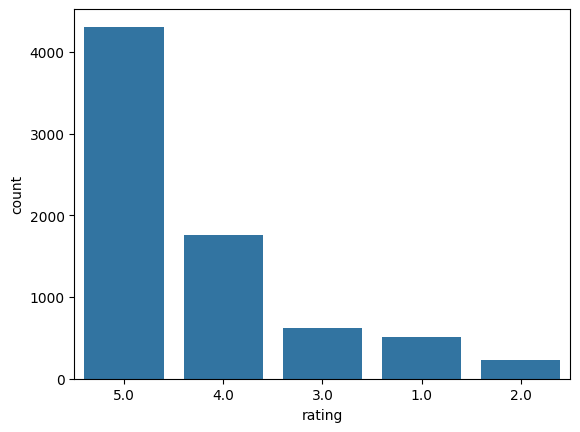

In [ ]:
sns.countplot(data=data,
			x='rating',
			order=data.rating.value_counts().index)


In [ ]:
# rating label(final)
pos_neg = []
for i in range(len(data['rating'])):
	if data['rating'][i] >= 5:
		pos_neg.append(1)
	else:
		pos_neg.append(0)

data['label'] = pos_neg


In [ ]:
from tqdm import tqdm


def preprocess_text(text_data):
	preprocessed_text = []

	for sentence in tqdm(text_data):
		# Removing punctuations
		sentence = re.sub(r'[^\w\s]', '', sentence)

		# Converting lowercase and removing stopwords
		preprocessed_text.append(' '.join(token.lower()
										for token in nltk.word_tokenize(sentence)
										if token.lower() not in stopwords.words('english')))

	return preprocessed_text


In [ ]:
data.head()


,review,rating,label
0,It was nice produt. I like it's design a lot. ...,5.0,1
1,awesome sound....very pretty to see this nd th...,5.0,1
2,awesome sound quality. pros 7-8 hrs of battery...,4.0,0
3,I think it is such a good product not only as ...,5.0,1
4,awesome bass sound quality very good bettary l...,5.0,1


In [ ]:
data["label"].value_counts()


label
1    4309
0    3134
Name: count, dtype: int64

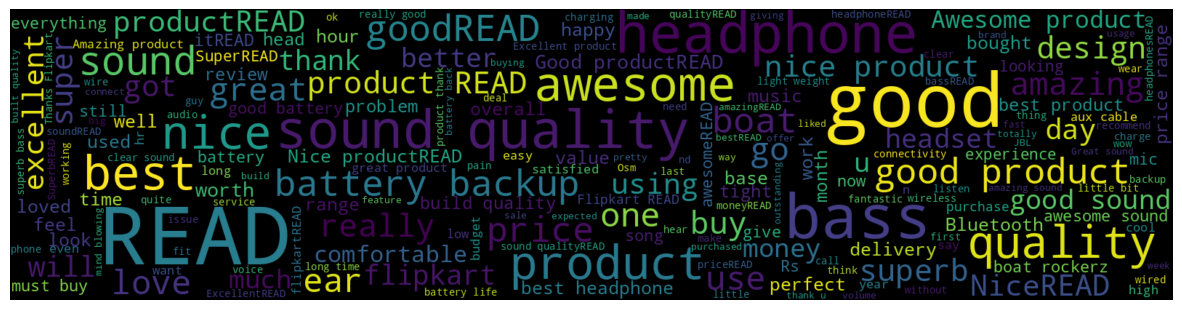

In [29]:
consolidated = ' '.join(
	word for word in data['review'][data['label'] == 1].astype(str))
wordCloud = WordCloud(width=1600, height=400,
					random_state=21, max_font_size=110)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['review'] ).toarray()


In [ ]:
X


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['label'],
													test_size=0.33,
													stratify=data['label'],
													random_state = 42)


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)

#testing the model
pred = model.predict(X_train)
print(accuracy_score(y_train,pred))


0.924187725631769


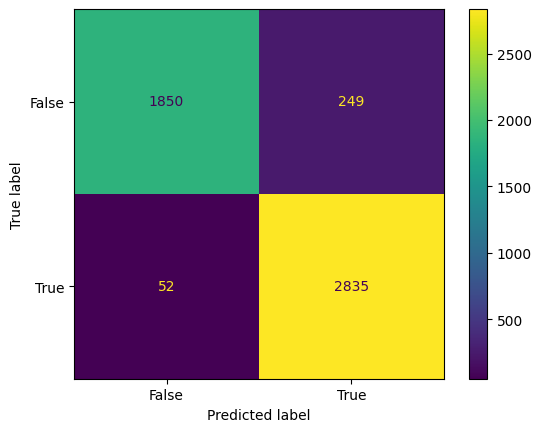

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
											display_labels = [False, True])

cm_display.plot()
plt.show()


In [34]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [38]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier

# Function to preprocess text data
def preprocess_text(text_data):
    preprocessed_text = []
    for sentence in text_data:
        # Removing punctuations
        sentence = re.sub(r'[^\w\s]', '', sentence)
        # Converting lowercase and removing stopwords
        preprocessed_text.append(' '.join(token.lower() for token in nltk.word_tokenize(sentence) if token.lower() not in stopwords.words('english')))
    return preprocessed_text

# Load your dataset (replace 'your_dataset.csv' with the path to your CSV file)
data = pd.read_csv('flipkart_data.csv')

# Drop rows with missing values
data.dropna(inplace=True)

# Preprocess the reviews
data['clean_review'] = preprocess_text(data['review'])

# Select features and target variable
X = data['clean_review']
y = data['rating']  # Assuming 'label' represents the target variable

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=2500)

# Vectorize the preprocessed reviews
X = vectorizer.fit_transform(X)

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=42)

# Initialize and train the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Function to make predictions for new inputs
def predict_sentiment(review):
    preprocessed_review = preprocess_text([review])
    review_vector = vectorizer.transform(preprocessed_review)
    prediction = clf.predict(review_vector)[0]
    if prediction == 5:
        return "Positive"
    else:
        return "Negative"

# Get input from the user
review_input = input("Enter your review: ")

# Make prediction using the input review
prediction = predict_sentiment(review_input)
print("Sentiment:", prediction)


Enter your review: Good looking Super Fine clear Sound and power full bass
Sentiment: Positive
